In [1]:
from keras.applications.resnet50 import ResNet50
import os
import shutil
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
model = ResNet50(weights='imagenet',
                    include_top=False,input_shape = (224, 224, 3))


94658560/94653016 [==============================] - 4s 0us/step


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2018-10-15 07:09:22--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  66.6MB/s    in 1.0s    

2018-10-15 07:09:23 (66.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print (train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print (train_dog_fnames[:10])

['cat.461.jpg', 'cat.221.jpg', 'cat.932.jpg', 'cat.263.jpg', 'cat.426.jpg', 'cat.442.jpg', 'cat.427.jpg', 'cat.345.jpg', 'cat.255.jpg', 'cat.156.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [8]:
print ('total training cat images:', len(os.listdir(train_cats_dir)) )
print ('total training dog images:', len(os.listdir(train_dogs_dir)))
print ('total validation cat images:', len(os.listdir(validation_cats_dir)))
print ('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

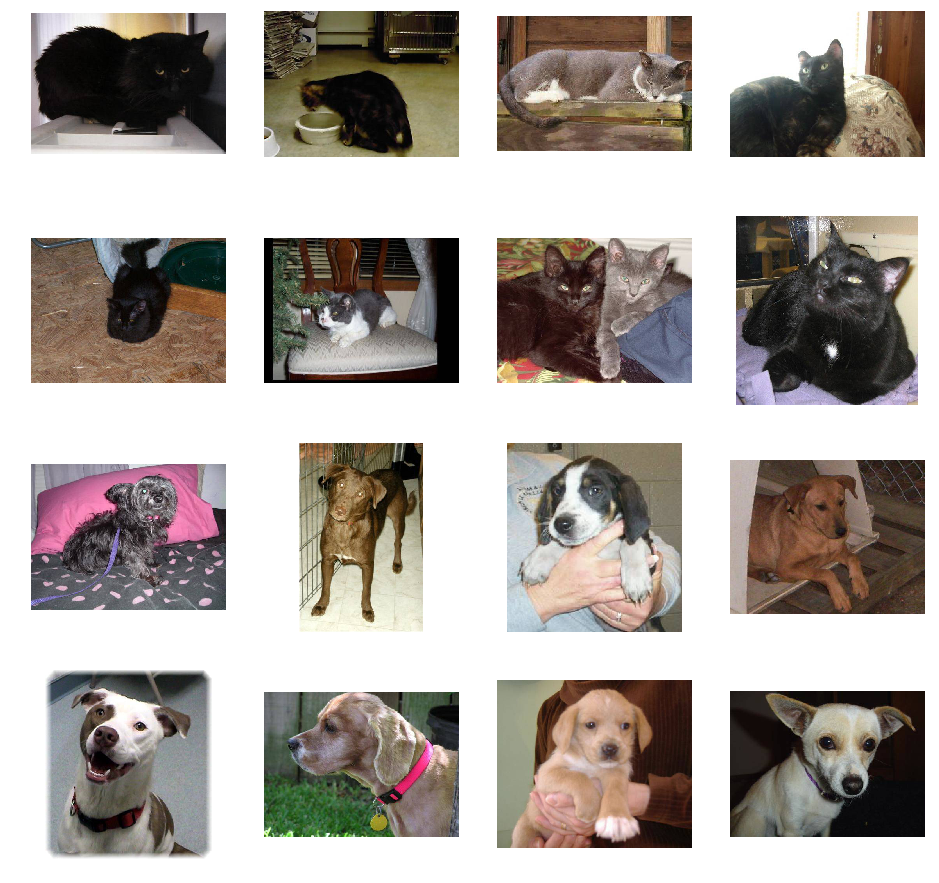

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        shuffle=True
        )

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        shuffle=True
        )



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for layer in model.layers:
   layer.trainable = False


In [0]:
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


In [0]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(8, activation="relu")(x)
x = Dropout(0.6)(x)
predictions = Dense(1, activation="sigmoid")(x)



In [0]:
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True), metrics=["accuracy"])



In [16]:
model_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
from google.colab import files
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model_final.fit_generator(
train_generator,
steps_per_epoch = 1000/32,
epochs = 20,
validation_data = validation_generator,
validation_steps = 500/32,
callbacks=callbacks_list
  )

Epoch 1/20
32/31 [==============================] - 653s 20s/step - loss: 0.7750 - acc: 0.5137 - val_loss: 0.8377 - val_acc: 0.4980

Epoch 00001: val_acc improved from -inf to 0.49805, saving model to weights-improvement-01-0.50.hdf5
Epoch 2/20
32/31 [==============================] - 739s 23s/step - loss: 0.7188 - acc: 0.5215 - val_loss: 0.8200 - val_acc: 0.4980

Epoch 00002: val_acc did not improve from 0.49805
Epoch 3/20
32/31 [==============================] - 723s 23s/step - loss: 0.6944 - acc: 0.5400 - val_loss: 0.8146 - val_acc: 0.4980

Epoch 00003: val_acc did not improve from 0.49805
Epoch 4/20
32/31 [==============================] - 668s 21s/step - loss: 0.6780 - acc: 0.5547 - val_loss: 0.8123 - val_acc: 0.4980

Epoch 00004: val_acc did not improve from 0.49805
Epoch 5/20
32/31 [==============================] - 685s 21s/step - loss: 0.6732 - acc: 0.5537 - val_loss: 0.8150 - val_acc: 0.4980

Epoch 00005: val_acc did not improve from 0.49805
Epoch 6/20
32/31 [================

In [0]:
model_final.load_weights('weights-improvement-01-0.49.hdf5')


In [34]:
import  keras.preprocessing.image as image
img1=image.load_img(train_cats_dir+'/'+train_cat_fnames[0],target_size=(224, 224))
img1=img1.resize((224,224))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
print(x.shape)
y_proba=model_final.predict(x)
print(y_proba.argmax(axis=-1))
label_map = (train_generator.class_indices)
print(label_map)

(1, 224, 224, 3)
[0]
{'cats': 0, 'dogs': 1}
